# Statistical Inference Homework #2  


### Amirhossein Mohammadi  
### Student Number: 810197689


## Question 7

In [ ]:
library(ggplot2)
library(dplyr)

There exist 5 types of positions in a software company: “UI Developers”, “Back-end Developers”, “management”, “HR” and “HSE”. Each type has 8, 12, 4, 3, 3 employees in order. Answer the following questions about this company:  
* Create two vectors containing the position types and their corresponding population



In [ ]:
postions = c("UI Developers", "Back-end Developers", "Management", "HR", "HSE")
num_employees = c(8, 12, 4, 3, 3)

*  Plot a bar chart of distributions of employees in different position types. Note that the plot must have a proper title in green color, and the x-label and the y-label should be in blue.

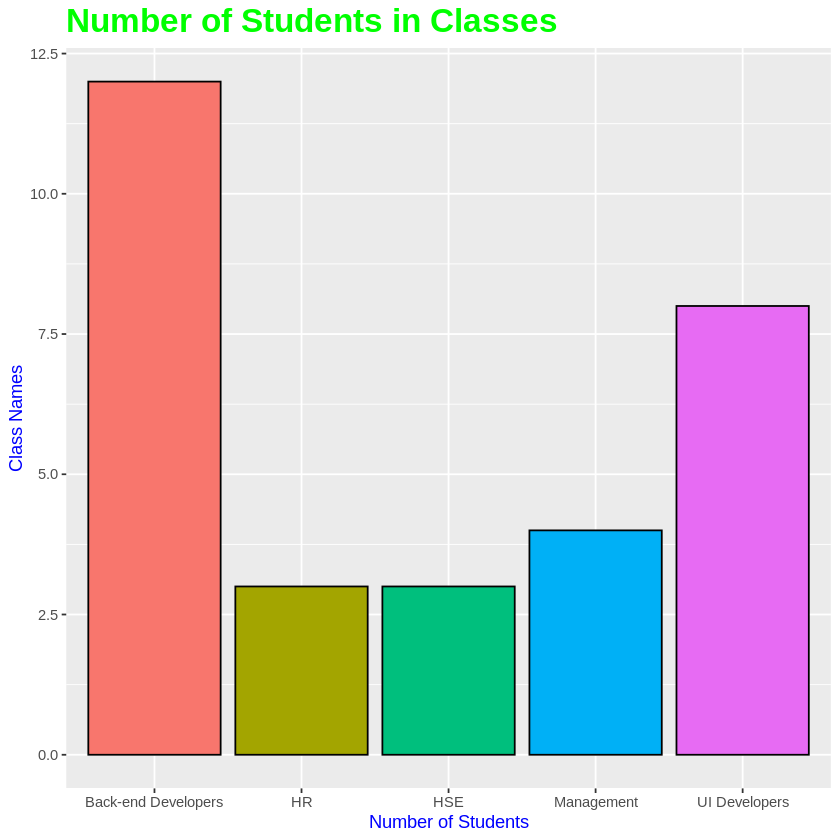

In [ ]:
plot <- ggplot(mapping = aes(x = postions, y = num_employees, fill = postions)) + 
  geom_bar(stat = 'identity', color = 'black')
plot + labs(title = "Number of Students in Classes",
             x = "Number of Students",
             y = "Class Names") +
  theme(plot.title = element_text(size=20,color="green",face="bold"),
        axis.title.x = element_text(color = "blue"),
        axis.title.y = element_text(color = "blue"),
        legend.position="none")

* Consider each position type has below salaries. Visualize a plot with 5 boxplots that shows salaries of different groups of position types.
UI Developers: 75000, 25000, 48000, 42000, 35200, 45000, 23000, 45500  
Back-end Developers: 20000, 80000, 36000, 46300, 41000, 43000, 22000, 37000, 39000, 43500, 69000, 5000  
Management: 80000, 67000, 56000, 82000  
HR: 45000, 39000, 30000  
HSE: 12000, 25000, 31500  

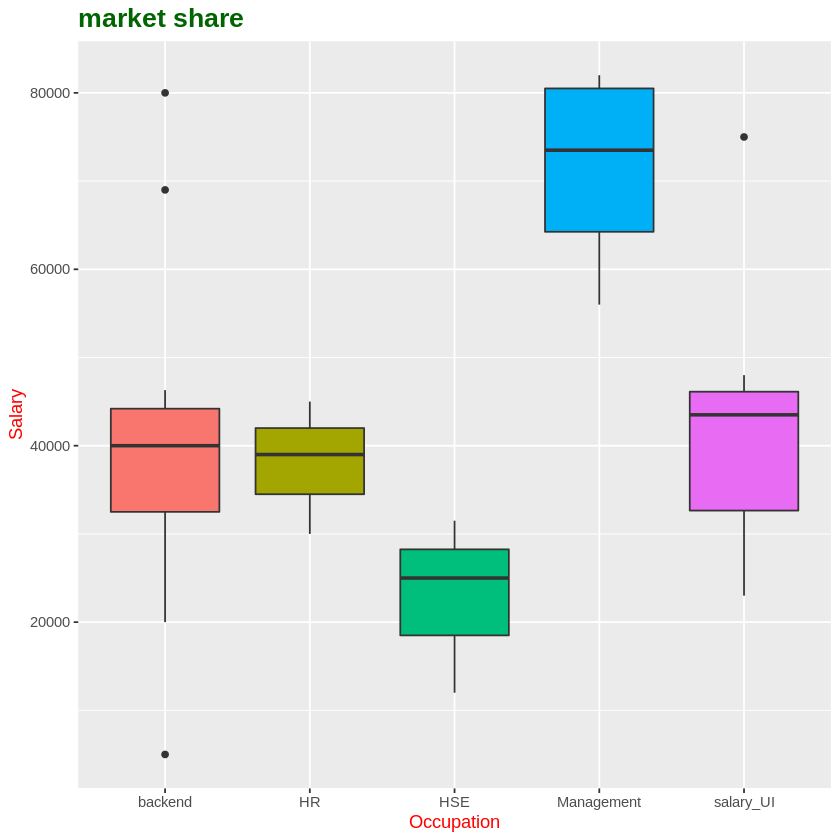

In [ ]:
salary_UI <- c(75000, 25000, 48000, 42000, 35200, 45000, 23000, 45500)
backend <- c(20000, 80000, 36000, 46300, 41000, 43000, 22000, 37000, 39000, 43500, 69000, 5000)
Management <- c(80000, 67000, 56000, 82000)
HR<- c(45000, 39000, 30000)
HSE <- c(12000, 25000, 31500)

occupations = c(rep("salary_UI", length(salary_UI)), rep("backend", length(backend)), rep("Management", length(Management)), rep("HR", length(HR)), rep("HSE", length(HSE)))
data <- data.frame(
  occupation = as.factor(occupations),
  salary = c(salary_UI, backend, Management, HR, HSE)
  )
ggplot(data = data, mapping = aes(x = occupation, y = salary) ) + 
geom_boxplot(mapping = aes(fill = occupation) ) +
  theme(legend.position="none")+
  labs(x = "Occupation", y = "Salary", fill ='red', 
         title = "market share") + 
        theme(plot.title = element_text(size=16,color="darkgreen",face="bold"),
        axis.title.x = element_text(color = "red"),
        axis.title.y = element_text(color = "red"))
    

* According to part c, find the exact quartile of the salary of each group and calculate IQR. Are there any outliers in any group? What are the exact values? Show the calculation of detecting outliers.

In [ ]:
data <- tbl_df(data)
q_data <- data  %>% 
  group_by(occupation) %>% 
  summarize(quant25 = quantile(salary, 0.25), 
            quant50 = quantile(salary, 0.5),
            quant75 = quantile(salary, 0.75)) %>%
  mutate(IQR = quant75 - quant25) %>%
  mutate(big_outliers_boundry = quant75 + IQR*3/2) %>%
  mutate(small_outliers_boundry = quant25 - IQR*3/2)

q_data

occupation,quant25,quant50,quant75,IQR,big_outliers_boundry,small_outliers_boundry
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
backend,32500,40000,44200,11700,61750.0,14950.0
HR,34500,39000,42000,7500,53250.0,23250.0
HSE,18500,25000,28250,9750,42875.0,3875.0
Management,64250,73500,80500,16250,104875.0,39875.0
salary_UI,32650,43500,46125,13475,66337.5,12437.5


In [ ]:
salary_UI_outliers = c(salary_UI[salary_UI>q_data$big_outliers_boundry[5]],
                      salary_UI[salary_UI<q_data$small_outliers_boundry[5]] )
salary_UI_outliers

[1] 75000

In [ ]:
backend_outliers = c(backend[backend>q_data$big_outliers_boundry[1]],
                     backend[backend<q_data$small_outliers_boundry[1]] )
backend_outliers

[1] 80000 69000  5000

In [ ]:
HR_outliers = c(HR[HR>q_data$big_outliers_boundry[2]],
                 HR[HR<q_data$small_outliers_boundry[2]] )
HR_outliers

numeric(0)

In [ ]:
HSE_outliers = c(HSE[HSE>q_data$big_outliers_boundry[3]],
                 HSE[HSE<q_data$small_outliers_boundry[3]] )
HSE_outliers

numeric(0)

In [ ]:
Management_outliers = c(Management[Management>q_data$big_outliers_boundry[4]],
                       Management[Management<q_data$small_outliers_boundry[4]] )
Management_outliers

numeric(0)

<font color = 'red'>As we can see UI Developers and Backend developers group has outlier.
for backend developers: `80000, 69000, 5000`
and for UI developers: `75000 `
There are two ways for finding outliers


1.   Calculate IQR and multiply it by 3/2 then add/subtract it to 1st/3rd precentile. the values out of this range would be know as outliers 
2.   In boxplot figure the outliers has been calculated from above and shown outside of the box.



* Discuss the skewness of distributions in each group salary. Then plot histogram and density plot of each group in 5 plots (both histogram and density plot must be in a single plot).

[1] "It is left-skewed since median is bigger than mean"
[1] "Skewness Coef:"
[1] -0.2150147
[1] "Mean and meadian respectivly:"
[1] 42337.5
[1] 43500
[1] 16219.82


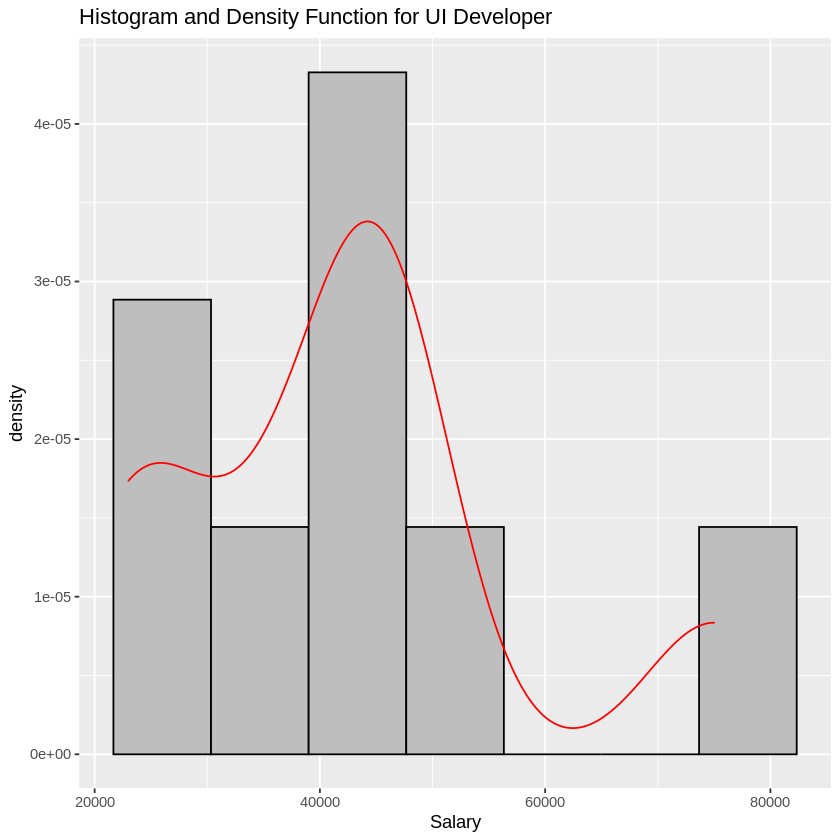

In [ ]:
plot1 <- ggplot(mapping = aes(salary_UI)) + 
  geom_histogram(aes(y = ..density..), bins = 7,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "Salary", title = "Histogram and Density Function for UI Developer")
plot1
var = salary_UI

mean_var = mean(var)
med_var = median(var) 
std_var = sd(var) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)


[1] "It is left-skewed since median is bigger than mean"
[1] "Skewness Coef:"
[1] -0.5556293
[1] "Mean and meadian respectivly:"
[1] 71250
[1] 73500


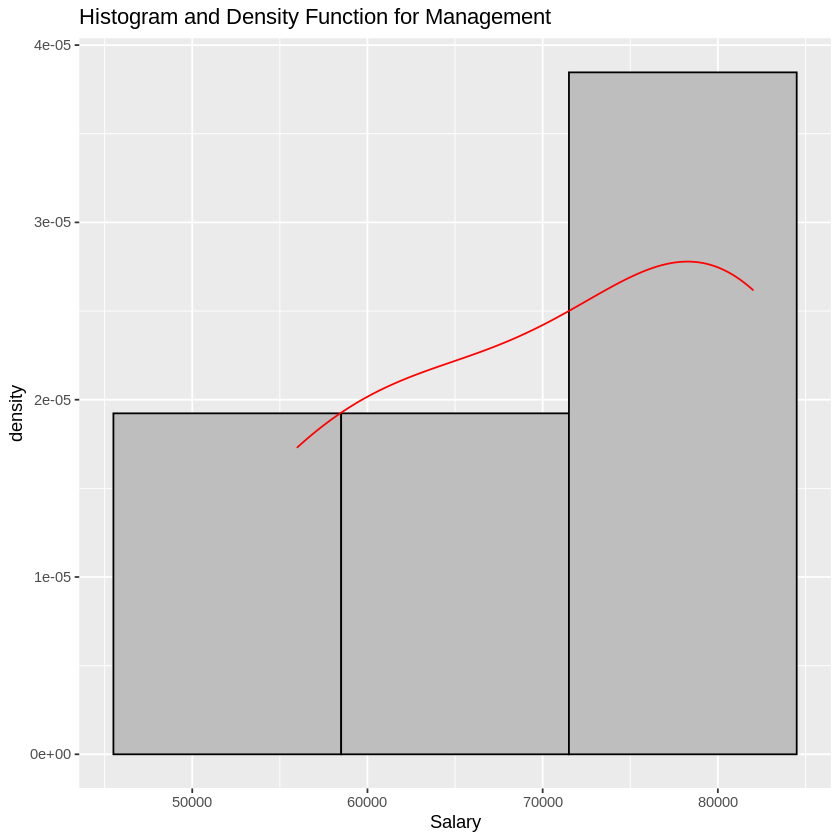

In [ ]:
plot1 <- ggplot(mapping = aes(Management)) + 
  geom_histogram(aes(y = ..density..), bins = 3,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "Salary", title = "Histogram and Density Function for Management")
plot1
var = Management

mean_var = mean(var)
med_var = median(var) 
std_var = sd(var) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)


[1] "It is right-skewed since median is smaller than mean"
[1] "Skewness Coef:"
[1] 0.022304
[1] "Mean and meadian respectivly:"
[1] 40150
[1] 40000


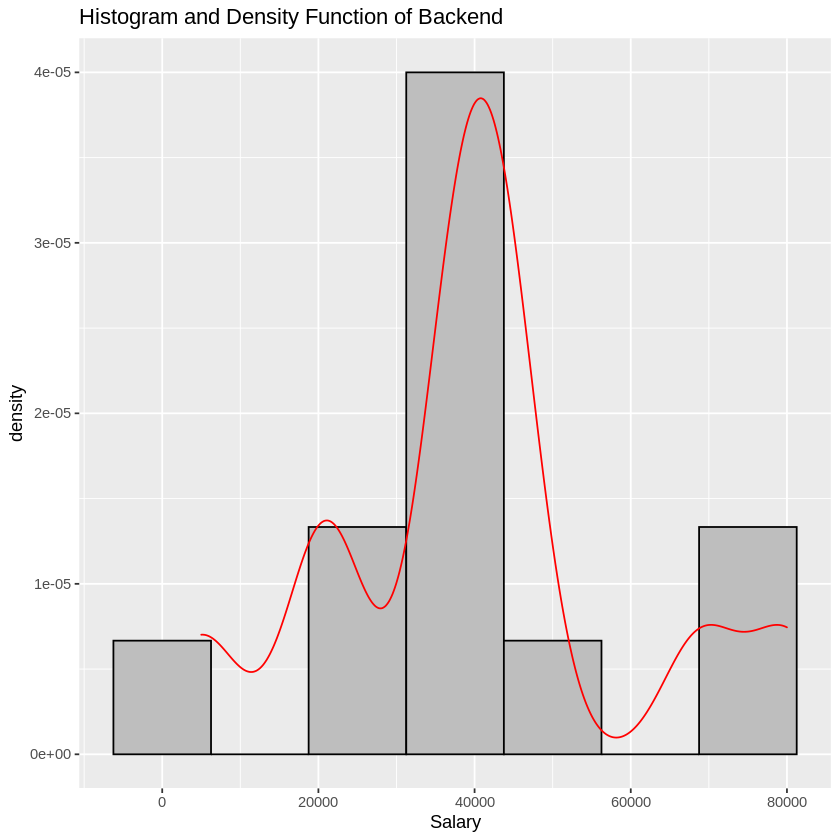

In [ ]:
plot1 <- ggplot(mapping = aes(backend)) + 
  geom_histogram(aes(y = ..density..), bins = 7,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "Salary", title = "Histogram and Density Function of Backend")
plot1
var = backend

mean_var = mean(var)
med_var = median(var) 
std_var = sd(var) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)

Number of data is very low but due to fomula it is right skewed, but the diffrence between mean and median is very low and can be symmetric

[1] "It is left-skewed since median is bigger than mean"
[1] "Skewness Coef:"
[1] -0.3973597
[1] "Mean and meadian respectivly:"
[1] 38000
[1] 39000


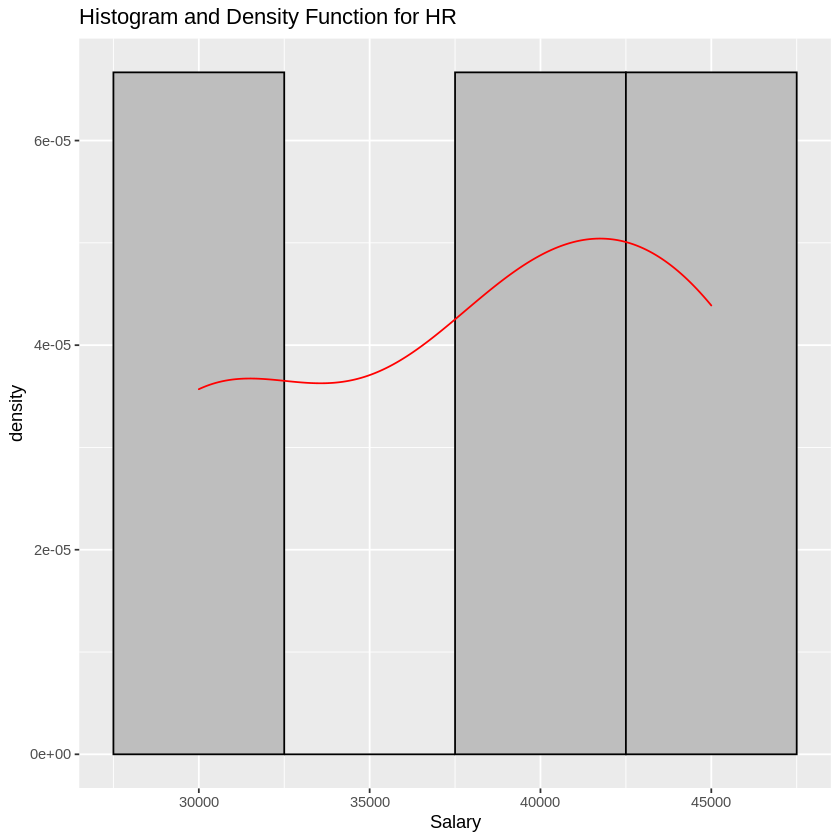

In [ ]:
plot1 <- ggplot(mapping = aes(HR)) + 
  geom_histogram(aes(y = ..density..), bins = 4,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "Salary", title = "Histogram and Density Function for HR")
plot1
var = HR

mean_var = mean(var)
med_var = median(var) 
std_var = sd(var) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)

Skewnewss of this part is some how ambigous since given data has very small size

[1] "It is left-skewed since median is bigger than mean"
[1] "Skewness Coef:"
[1] -0.6546537
[1] "Mean and meadian respectivly:"
[1] 22833.33
[1] 25000


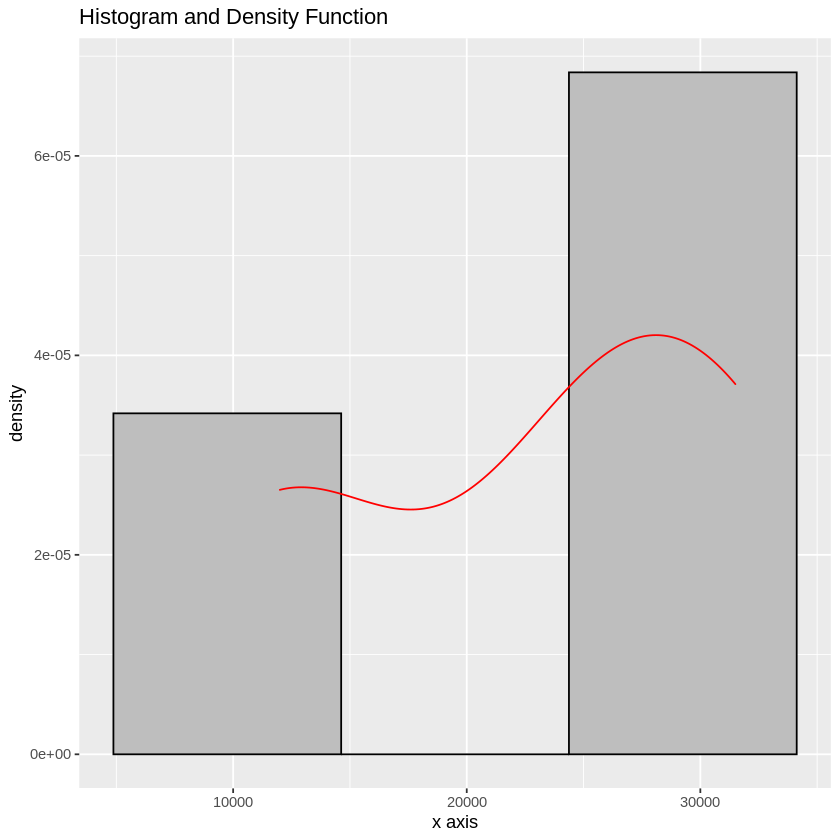

In [ ]:
plot1 <- ggplot(mapping = aes(HSE)) + 
  geom_histogram(aes(y = ..density..), bins = 3,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "x axis", title = "Histogram and Density Function")
plot1
var = HSE

mean_var = mean(var)
med_var = median(var) 
std_var = sd(var) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)

* Categorize all employees based on their salary into 5 groups: “very high” (>50000), “high” (>40000), “middle” (>30000), “low” (>20000), and “very low” (<=20000). Plot a pie chart that visualizes the frequency of these five categories. Each category must have a percentage and should have a unique color. Draw a legend for your pie chart.

In [ ]:
very_high = nrow(filter(data, salary > 50000))
high = nrow(filter(data, salary < 50000|salary > 40000))
middle = nrow(filter(data, salary > 40000|salary > 30000))
low = nrow(filter(data, salary < 30000 |salary > 20000))
very_low = nrow(filter(data, salary < 10000))
categories = c("very_high", "high", "middle", "low", "very_low")

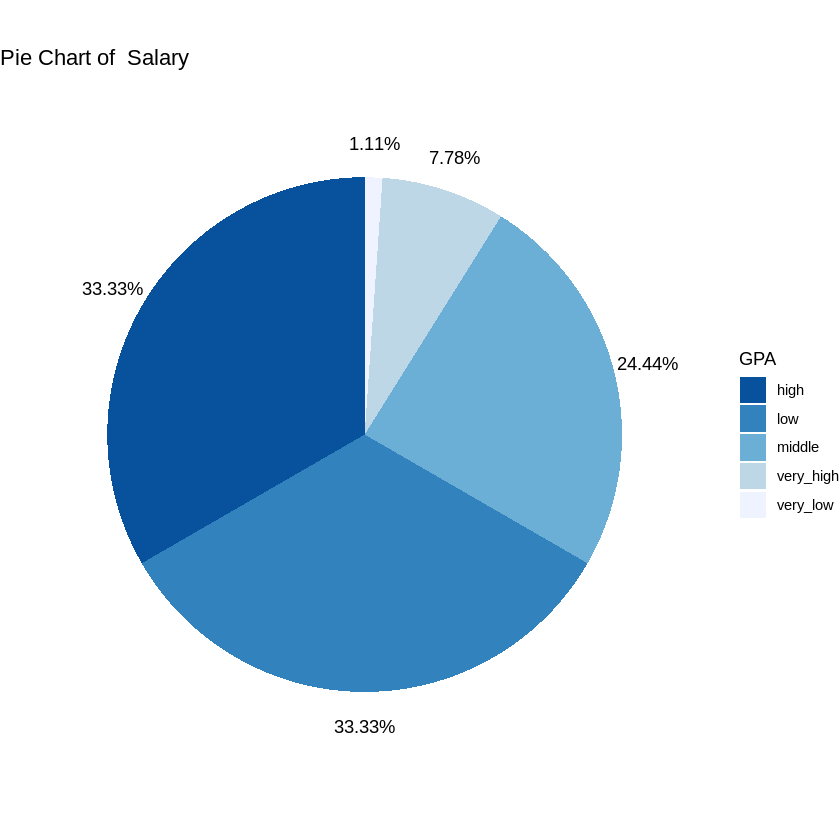

In [ ]:

data <- data.frame(
  group = c("very_high", "high", "middle", "low", "very_low"),
  value=c(very_high, high, middle, low, very_low)
)
data <- data %>% 
  mutate(per = round(value/sum(value), 4)*100)%>%
  mutate(Percentage=paste0(per,  "%"))%>%
  arrange(value)
ggplot(data, aes(x = "", y = value, fill = group)) +
  geom_col() +
  geom_text(aes(x = 1.57,label = Percentage),
            position = position_stack(vjust = 0.5,)) +
  coord_polar(theta = "y")+
  ggtitle("Pie Chart of  Salary") +
  scale_fill_brewer(direction = -1) + theme_void() + guides(fill=guide_legend("GPA"))

* For back-end developers group calculate mean, median, variance, and standard derivations.

In [ ]:
mean_backend = mean(backend)
median_backend = median(backend)
var_backend = var(backend)
std__backend = sd(backend)

In [ ]:
sprintf("Mean Back-end Developers Salary: %f", mean_backend) 
sprintf(" Median of Backend Developers: %f", median_backend) 
sprintf("Variance and Standard Deviation of Backend Developers:%f, %f", var_backend,std__backend)

[1] "Mean Back-end Developers Salary: 40150.000000"

[1] " Median of Backend Developers: 40000.000000"

[1] "Variance and Standard Deviation of Backend Developers:407060909.090909, 20175.750521"

## Question 8

Below are the final exam scores of twenty introductory statistics students.
57, 66, 72, 78, 79, 79, 81, 81, 82, 83, 84, 87, 88, 88, 89, 90, 91, 92, 94, 95


a. Create a vector of scores.

In [ ]:
data = c(57, 66, 72, 78, 79, 79, 81, 81, 82, 83, 84, 87, 88, 88, 89, 90, 91, 92, 94, 95)


b. Calculate median, mode, variance and standard deviation of scores

 <font color='red'> As shown below Median, Mean, Variance, and Standard Deviation has been calculated and shown respectively.</font>


In [ ]:

med_data = median(data)
mean_data = mean(data)
var_data = var(data)
svd_data = sqrt(var_data)
sorted_data = sort(data)
med_data
mean_data
var_data 
svd_data

[1] 83.5

[1] 82.8

[1] 90.16842

[1] 9.495705

c. Are there any outliers in any group? What are the exact values? Show the calculation of detecting outliers.

<font color = 'red' > Yes, It has one outlier and its value is 57. Method of calculating outliers has been explained in previous part following. shows the implementation. </font>

In [ ]:
Q3 = quantile(data, 0.75)
Q1 = quantile(data, 0.25)
IQR = Q3 - Q1
outliers = c(data[data>Q3+ 3/2*IQR], data[data < Q1 - 3/2*IQR])
outliers

[1] 57

d. Plot the boxplot.

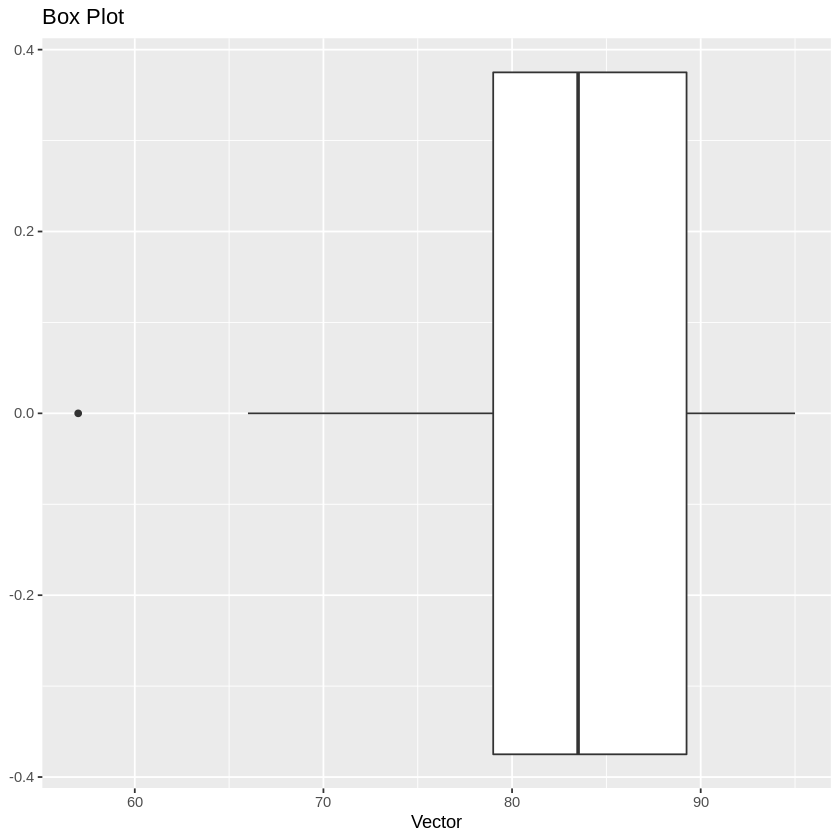

In [ ]:
#Plotting Boxplot:

y0 = rep(0, length(data))

plot0 <- ggplot(mapping = aes(data))+
  geom_boxplot()
  # geom_point(mapping = aes(data, y0))
plot0 <- plot0 + labs(x = "Vector", title = "Box Plot")
plot0


e. Plot the histogram and the density of scores in a single plot.

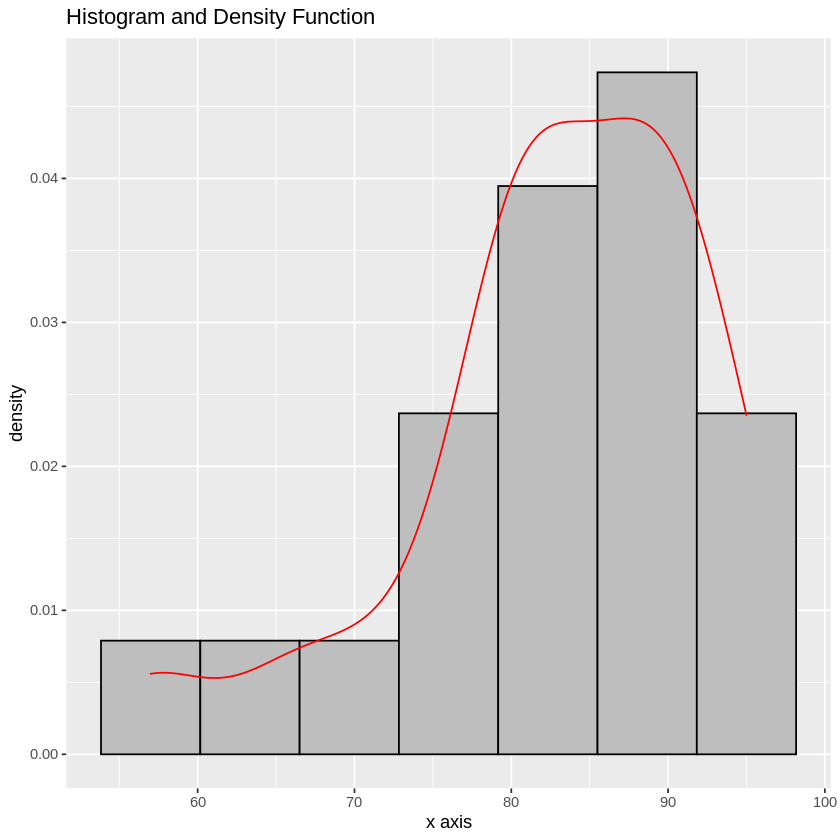

In [ ]:
# Ploting Histongram of data
plot1 <- ggplot(mapping = aes(data)) + 
  geom_histogram(aes(y = ..density..), bins = 7,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot1 <- plot1 + labs(x = "x axis", title = "Histogram and Density Function")
plot1


i. Based on the plots, discuss the skewness of scores.

<font color = 'red'> As shown in histogram and density function we can see that it has a tail on the left side so it is left skewed. median is bigger than the mean, this is also showing that it is left skewd.



In [ ]:
mean_var = mean(data)
med_var = median(data) 
std_var = sd(data) 
Skew = 3 * (mean_var - med_var) / std_var
if (Skew>0){
  print('It is right-skewed since median is smaller than mean')
}else{
 print('It is left-skewed since median is bigger than mean') 
}
print("Skewness Coef:")
print(Skew)
print("Mean and meadian respectivly:")
print(mean_var)
print(med_var)

[1] "It is left-skewed since median is bigger than mean"
[1] "Skewness Coef:"
[1] -0.2211526
[1] "Mean and meadian respectivly:"
[1] 82.8
[1] 83.5


ii. Based on the plots, would you expect the mean of this dataset to be smaller or larger than the median? Explain your reasoning.   
<font color = 'red'> We expect that mean be smaller than the median, since it has tail on the left and has negative skewness. our calculation approves our intuition as shown above. </font>

iii. What is the best measurement of the center for the scores? Why?  
<font color = 'red' > For data from skewed distributions, the median is better than the mean because it isn’t influenced by extremely large values. Since our data is skewed one, median is a good choice.

## Question 9 

Create a numeric vector with 6 elements as follows: 25,30,35,20, 25. These values are the number of students in five different classes: “class1”, “class2”, “class3”, “class4”, “class5”.
a. Add the corresponding classes as the name of the elements to the vector you have created.


a. Add the corresponding classes as the name of the elements to the vector you have created.

In [ ]:
v = c(25, 30, 35, 20, 25)
class_name = c("class1",  "class2", "class3", "class4", "class5")

b. Plot a bar chart to analyze the distribution of the number of students. The bar chart should have a title with a dark green font and the axes labels should be in red.


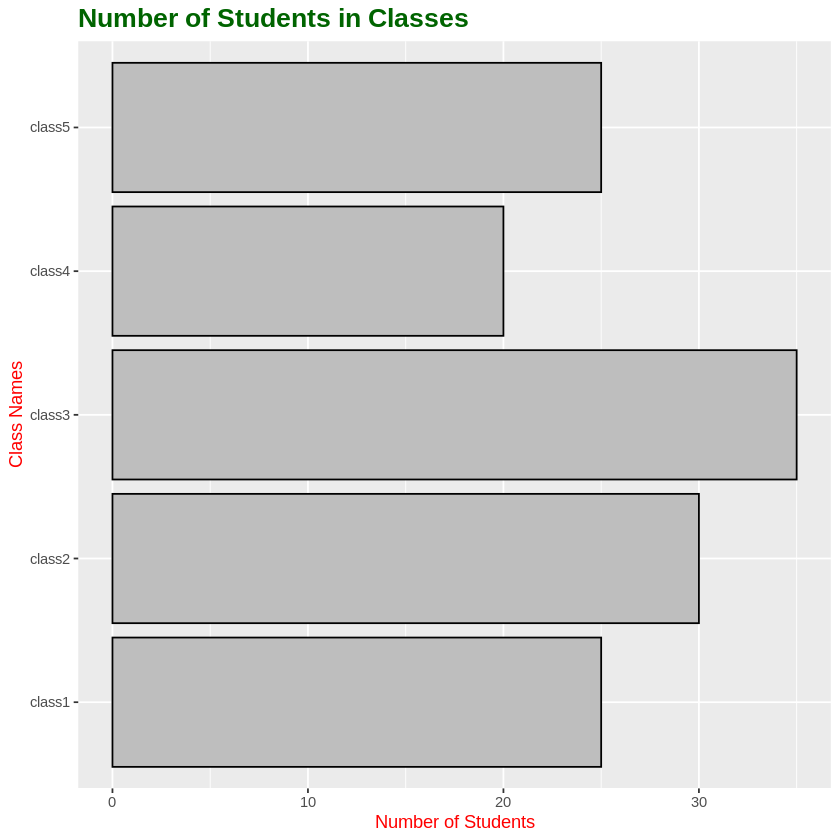

In [ ]:
plot2 <- ggplot(mapping = aes(x=v, y=class_name))+
  geom_bar(stat = "identity", fill = 'grey', color = 'black')

plot2 + labs(title = "Number of Students in Classes",
             x = "Number of Students",
             y = "Class Names") +
  theme(plot.title = element_text(size=16,color="darkgreen",face="bold"),
        axis.title.x = element_text(color = "red"),
        axis.title.y = element_text(color = "red"))
      


c. Create the “top_student” vector with 5 elements 3,5,2,1 and 4 that shows the number of students with a GPA above 19. Plot a scatterplot that displays the relationship between the number of top students and the number of students in the class. Change the plotting character to “*”.


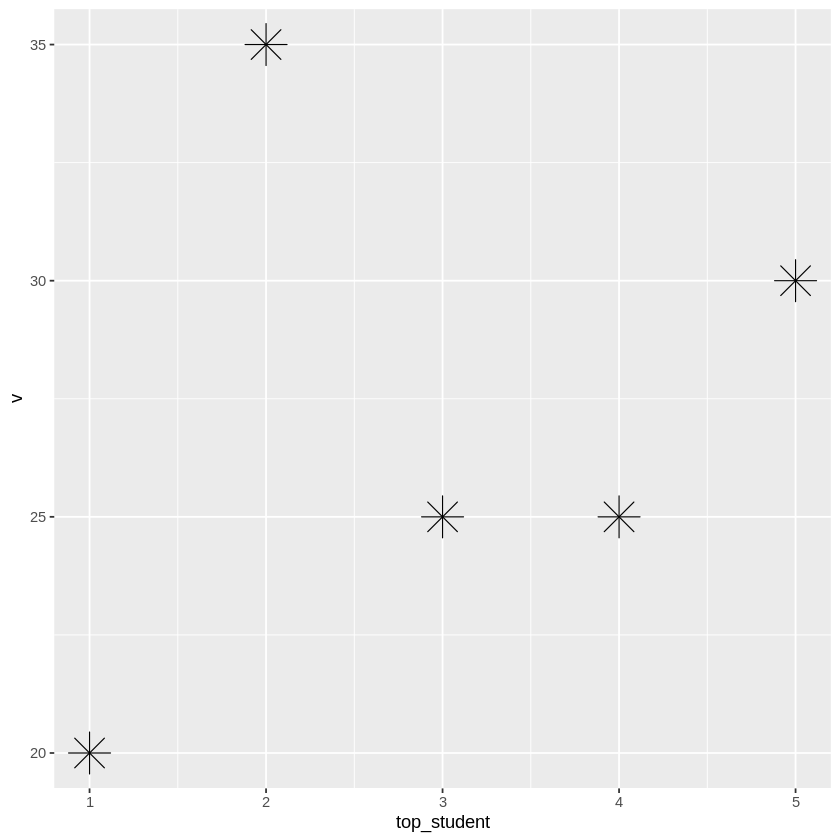

In [ ]:
top_student <- c(3, 5, 2, 1, 4)
ggplot(mapping = aes(x = top_student,y = v)) + geom_point(shape = 8, size = 8)

d. Could it be conducted from the scatterplot in that there is a relation between these two variables?  
<font color = 'red'> there is some how a relation between number of students and number of top students in that class, as number of students increases number of top students also increases. the outcome is not strong though.

e. GPAs of the students in “class4” are as follows. Find the exact quartiles of the grades by plotting the boxplot. Are there any outliers? What are the exact values?
“19.5, 16.75, 13.5, 16.25, 5, 12.5, 15.5, 15, 11, 16.5, 12.75, 15.5, 12.75, 9.75, 11, 14.5, 16.75, 11.5, 17, 18.25”

[1] 5


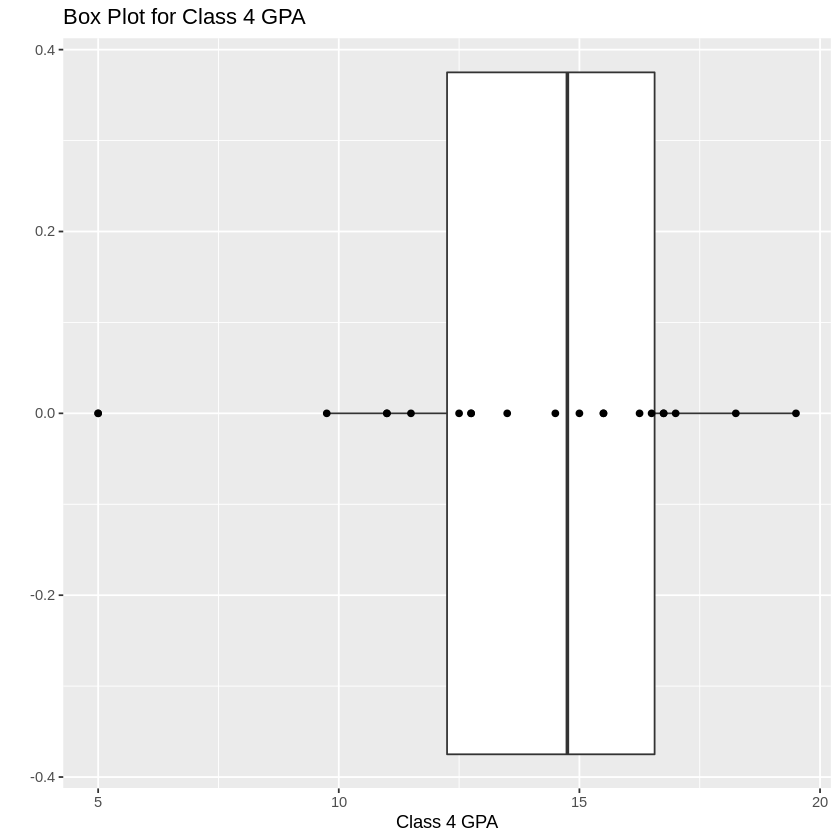

In [ ]:
class4_gpa = c(19.5, 16.75, 13.5, 16.25, 5, 12.5, 15.5, 15, 11, 16.5,
            12.75, 15.5, 12.75, 9.75, 11, 14.5, 16.75, 11.5, 17, 18.25)
ggplot() + 
  geom_boxplot(mapping = aes(x=class4_gpa)) + 
  geom_point(mapping = aes(x=class4_gpa, y=rep(0, length(class4_gpa))))+
  xlab("Class 4 GPA") + ylab(" ")+
  ggtitle("Box Plot for Class 4 GPA")

In [ ]:
Q3 = quantile(class4_gpa, 0.75)
Q1 = quantile(class4_gpa, 0.25)
x = 3/2 * (Q3 - Q1)
list_small_outliers = class4_gpa[class4_gpa < (Q1-x)]
list_big_outliers = class4_gpa[class4_gpa > (Q3+x)]
outliers = c(list_small_outliers, list_big_outliers)
sprintf("Outliers:  %d", outliers)

[1] "Outliers:  5"

<font color = 'red'> as shown in above we have an outlier which value is 5.

f. Discuss the skewness of the distribution of the grades in “class4” by plotting its histogram and density plot. What is the difference between these two plots?


<font color = 'red'> from figure we can see it is left skewed since it has negative tail. on the other hand median is bigger than the mean and this confirms our statement.

Diffrence Between Histogram and Density plot: <font color = 'red'>Creating the histogram provides the Visual representation of data distribution. By using a histogram we can represent a large amount of data, and its frequency. Density Plot is the continuous and smoothed version of the Histogram estimated from the data. It is estimated through Kernel Density Estimation.

[1] 14.0625

[1] 14.75

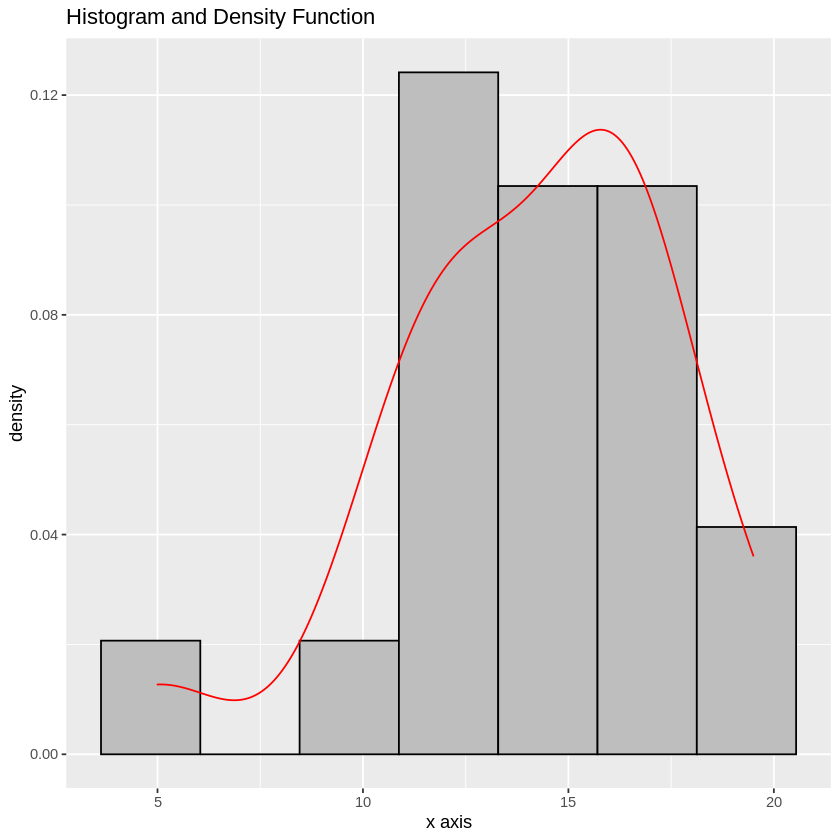

In [ ]:
#f

plot3 <- ggplot(mapping = aes(class4_gpa)) + 
  geom_histogram(aes(y = ..density..), bins = 7,
                 fill = 'grey', color = 'black') +
  geom_density(color = 'red')
plot3 <- plot3 + labs(x = "x axis", title = "Histogram and Density Function")
plot3
mean(class4_gpa)
median(class4_gpa)

g. We want to categorize the grades into “D” (<13), “C” (<15), “B” (<18) and “A” (>=18). Plot a pie chart that visualizes frequency of these four categories. Your chart should be colorized and the labels should contain each category with its percentage

group,value,Percentage
<chr>,<int>,<chr>
C,2,10%
A,2,10%
D,8,40%
B,8,40%


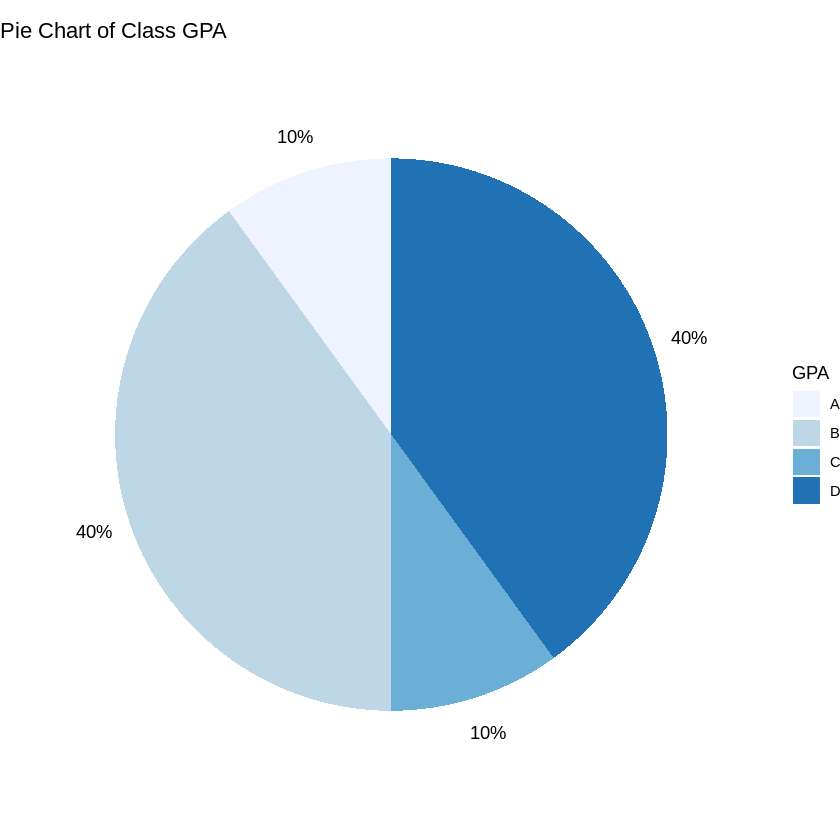

In [ ]:

library(ggplot2)
library(dplyr)

D = length(class4_gpa[class4_gpa<13])
C = length(class4_gpa[(13<=class4_gpa) & (class4_gpa<15)])
B = length(class4_gpa[(15<=class4_gpa) & (class4_gpa<18)])
A = length(class4_gpa[class4_gpa>=18])


data <- data.frame(
  group=c('A', 'B', 'C', 'D'),
  value=c(A, B, C, D)
)
data <- data %>% 
  arrange(desc(group)) %>%
  mutate(Percentage=paste0(value /sum(value) *100,  "%"))%>%
  arrange(value)
data

ggplot(data, aes(x = "", y = value, fill = group)) +
  geom_col() +
  geom_text(aes(x = 1.57,label = Percentage),
            position = position_stack(vjust = 0.5,)) +
  coord_polar(theta = "y")+
  ggtitle("Pie Chart of Class GPA") +
  scale_fill_brewer("Blues") + theme_void() + guides(fill=guide_legend("GPA"))
